# Graficando campos 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

Aquí definimos la "malla" a ser usada, con el comando `meshgrid` de Numpy

In [2]:
n = 20 # nodos de la grilla
max = 2 # máximo y mínimo del gráfico
X = np.linspace(-max,max,n)
Y = np.linspace(-max,max,n)
x,y = np.meshgrid(X,Y)

Definimos las 2 funciones $E_x$ y $E_y$ del campo vectorial 2D:
$$
\vec{E}(x,y)=E_x(x,y)\hat{x}+E_y(x,y)\hat{y}
$$
Ejemplo: 
$$
\vec{E}(x,y)=y\hat{x}-x\hat{y}

$$

In [3]:
def Ex(x,y): 
    return y
def Ey(x,y):
    return -x
def E(x,y): # módulo del campo eléctrico, para normalización
    return np.sqrt((Ex(x,y))**2+(Ey(x,y))**2)

Ahora graficamos usando `quiver` de `matplotlib.pyplot`.

Por defecto, `quiver` representa el módulo del campo como en largo de cada flecha

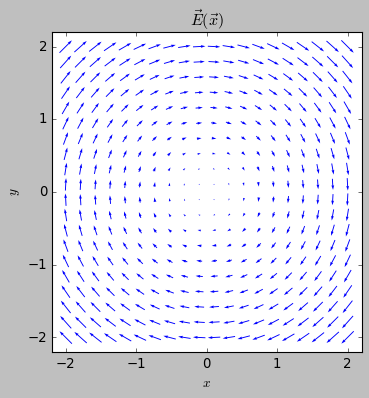

In [4]:
plt.figure(figsize=(5,5))
plt.quiver(x,y,Ex(x,y),Ey(x,y), color='blue', scale=50, pivot='middle')
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\\vec{E}(\\vec{x})$')
plt.savefig('campo2d.pdf')

También podemos graficar el *campo normalizado* (de modo que las fechas sólo representan la dirección del campo)

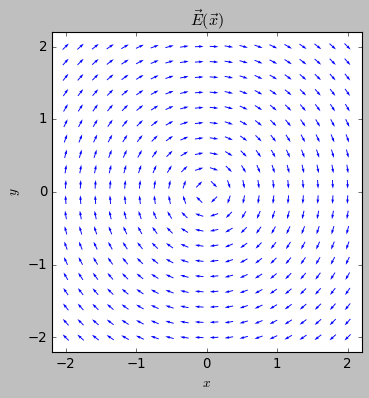

In [5]:
plt.figure(figsize=(5,5))
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y), color='blue', pivot='middle')
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\\vec{E}(\\vec{x})$')
plt.savefig('campo2d-normalizado.pdf')

Otra alternativa es graficar el campo normalizado y codificar el módulo del campo en una *escala de colores* ("color map"), usando la opción `cmap`. Ver https://matplotlib.org/stable/tutorials/colors/colormaps.html para más detalles y una lista de los mapas de colores disponibles.

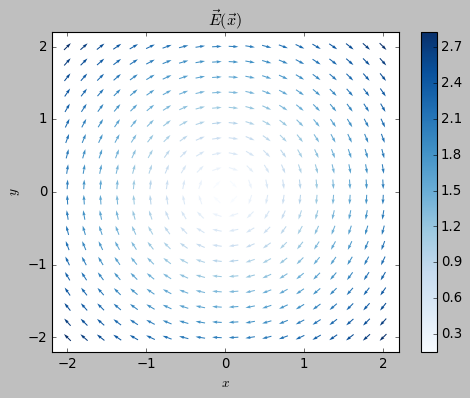

In [6]:
plt.figure(figsize=(7,5))
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), pivot='middle', cmap='Blues')
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\\vec{E}(\\vec{x})$')
plt.colorbar()
plt.savefig('campo2d-normalizado-colores.pdf')

# Líneas de campo: integración numérica
Ahora encontraremos una solución numérica para las líneas de campo eléctrico. Para eso usaremos la función `odeint` de `scipy.integrate`, que integra un sistema de EDO's de primer orden (no-lineal, acoplado) que se indique.

In [7]:
from scipy.integrate import odeint

`odeint` resuelve numéricamente sistemas de EDO's de primer orden de la forma
$$
\frac{dX}{dt}=f(X,t)
$$
donde $X(t)=[X_0(t),X_1(t), \dots,X_N(t)]$ es el vector de las $N$ incógnitas y $f(X,t)=[f_0(X,t),f_1(X,t),\dots,f_N(X,t)]$ es la función que define el sistema.

En nuestro caso bidimensional ($N=2$), el sistema de EDO's es de la forma
$$
\frac{dx}{dt}(t) = E_x(x(t),y(t))
$$
$$
\frac{dy}{dt}(t) = E_y(x(t),y(t))
$$

Definimos por lo tanto la función $f$ requerida de la forma siguiente:

In [8]:
def f(XX,t):
    x, y = XX
    dxdt = Ex(x,y)
    dydt = Ey(x,y)
    return [dxdt,dydt]

Además, necesitamos definir el arreglo de valores de $t$ en los que se encontrará la solución numérica, y una condición inicial $X(t=0)=[X_0(0), X_1(0), \dots, X_N(0)]$

In [9]:
t = np.linspace(0,5,1000)
X0 = [1,0]

Con eso, podemos llamar a la función `odeint` del modo siguiente:

In [10]:
Xsol = odeint(f,X0,t)
xsol = Xsol[:,0]
ysol = Xsol[:,1]

Podemos agregar la curva encontrada numéricamente a nuestro gráfico anterio:

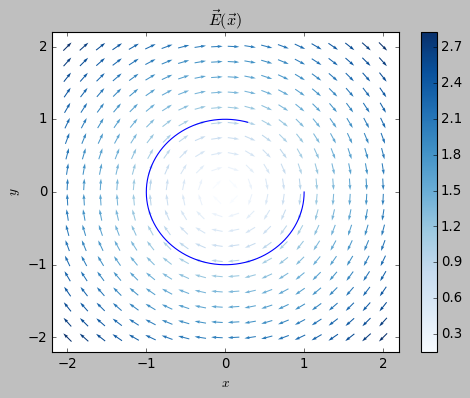

In [11]:
plt.figure(figsize=(7,5))
plt.quiver(x,y,Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap='Blues')
plt.xlim(-1.1*max,1.1*max)
plt.ylim(-1.1*max,1.1*max)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\\vec{E}(\\vec{x})$')
plt.plot(xsol,ysol)
plt.colorbar()
plt.savefig('campo2d-normalizado-colores-y-solucion-numerica.pdf')